In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
df = pd.read_csv('Titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# dropping unnecessary columns
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [7]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [8]:
# check null values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Cabin column has too many null values so we drop it
df.drop(columns='Cabin', inplace=True)

In [10]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [11]:
df['Embarked'].fillna('Q', inplace=True)

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

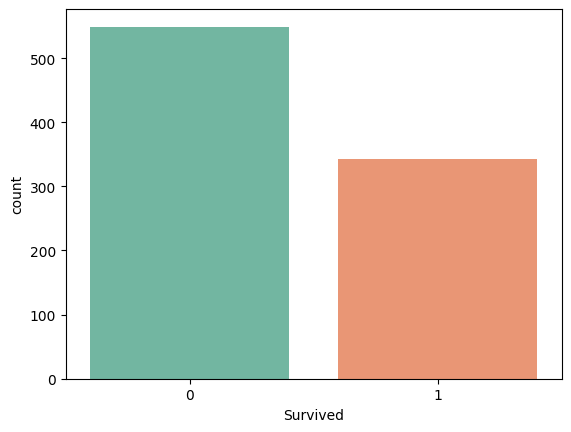

In [14]:
sns.countplot(data=df, x='Survived', palette='Set2')
plt.show()

In [15]:
# define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [18]:
# scale numeric features
num_cols = ["Age", "Fare", "SibSp", "Parch"]
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [19]:
# one hot encode categorical features
cat_cols = ["Sex", "Embarked"]
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_test  = pd.get_dummies(X_test,  columns=cat_cols, drop_first=True)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [20]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
692,3,-0.355160,-0.465084,-0.466183,0.513812,True,False,True
481,2,-0.355160,-0.465084,-0.466183,-0.662563,True,False,True
527,1,-0.355160,-0.465084,-0.466183,3.955399,True,False,True
855,3,-0.809503,-0.465084,0.727782,-0.467874,False,False,True
801,2,0.174907,0.478335,0.727782,-0.115977,False,False,True


In [21]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
565,3,-0.355160,1.421753,-0.466183,-0.159704,True,False,True
160,3,1.159318,-0.465084,0.727782,-0.327324,True,False,True
553,3,-0.506608,-0.465084,-0.466183,-0.512122,True,False,False
860,3,0.932146,1.421753,-0.466183,-0.368795,True,False,True
241,3,-0.355160,0.478335,-0.466183,-0.339817,False,True,False


In [22]:
X_train = X_train.astype("float32")
X_test  = X_test.astype("float32")
y_train = y_train.astype("float32")
y_test  = y_test.astype("float32")

In [23]:
# define the ANN model

input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(units=32, input_shape=(input_dim,), activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [26]:
# apply early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[es], verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 17ms/step - loss: 0.7269 - accuracy: 0.4288 - val_loss: 0.6934 - val_accuracy: 0.6294
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6463 - accuracy: 0.6257 - val_loss: 0.6436 - val_accuracy: 0.5944
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6056 - accuracy: 0.6274 - val_loss: 0.6179 - val_accuracy: 0.6014
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.6397 - val_loss: 0.5978 - val_accuracy: 0.6294
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5628 - accuracy: 0.6784 - val_loss: 0.5786 - val_accuracy: 0.6643
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5462 - accuracy: 0.7065 - val_loss: 0.5629 - val_accuracy: 0.7063
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.5322 - accuracy: 0.7364 - val_loss: 0.5488 - val_accuracy: 0.7483
Epoch 8/100


In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

6/6 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8156
Test accuracy: 0.8156424760818481
Test loss: 0.45221298933029175


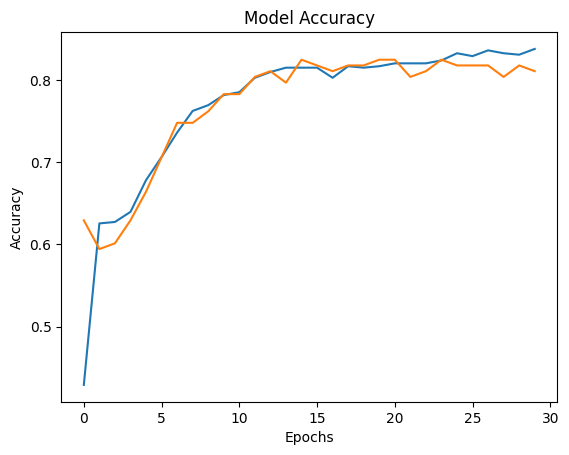

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

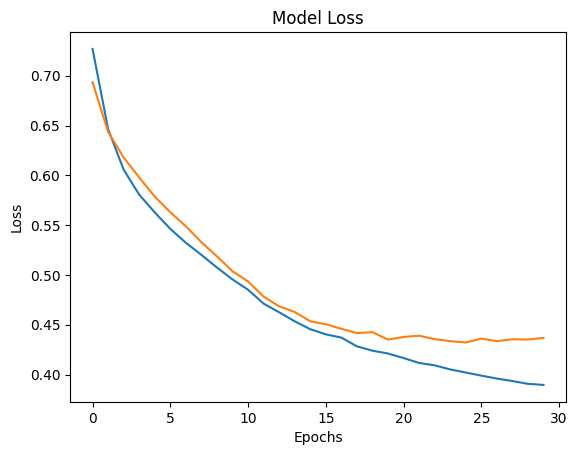

In [30]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [31]:
# get predictions (probabilities) and then convert to binary (0/1)
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs>0.5).astype('int')

6/6 [==============================] - 0s 753us/step


In [32]:
confusion_matrix(y_test, y_pred)

array([[96, 14],
       [19, 50]], dtype=int64)

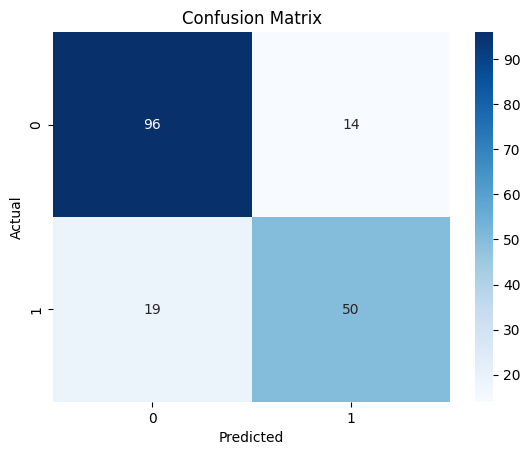

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       110
         1.0       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

